<a href="https://colab.research.google.com/github/saga/Cheatsheets/blob/master/10a-julia-colab-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Julia Language Colab Demo Notebook

This notebook demonstrates basic [Julia](https://julialang.org/) language features and how to use them in a Jupyter notebook environment, particularly in Google Colab which now supports Julia natively.

Julia combines the ease of use of high-level languages like Python with the performance of low-level languages like C, making it an excellent choice for scientific computing, data science, and machine learning.

Throughout the notebook, we'll try to connect some features from R & Python to Julia through 'notes' ala:

> **For R Users**: If you're coming from R, you'll appreciate Julia's 1-based indexing and statistical capabilities.

> **For Python Users** Python users will find Julia's syntax familiar but with performance advantages and a more consistent standard library.

## Google Colab-Specific Features for Julia


### Create a New Julia Notebook Directly

You can create a new Julia notebook from scratch by clicking:

<https://colab.research.google.com/notebook#create=true&language=julia>


### Modify an existing notebook

Existing notebooks can be switched to using a Julia by:

**Runtime** Menu -> Pick **Change runtime type** -> Select **Julia** Option under **Runtime Type** -> Press **Save**.

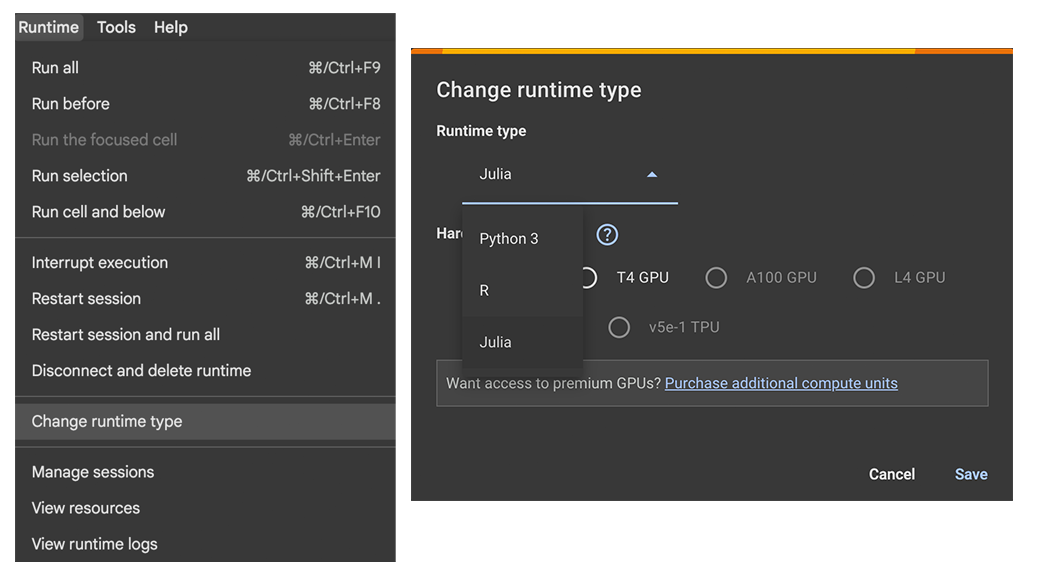

### Default Environment

 The default installation includes essential packages for data analysis and visualization, though you may need to install additional packages for specialized tasks. Google Colab's Julia environment provides a convenient cloud-based solution for Julia programming without requiring local installation. Performance is generally good for educational and light computational tasks, though intensive operations may benefit from local installations or dedicated Julia-focused platforms. This environment refreshes with each session, so consider adding package installation cells for reproducibility.

In [1]:
# Check Julia version
println("=== Backend Information ===")
println(versioninfo())

# Display installed packages
println("\n=== Installed Packages ===")
using Pkg
Pkg.status()

=== Backend Information ===
Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto
nothing

=== Installed Packages ===
Status `~/.julia/environments/v1.10/Project.toml`
  [79e6a3ab] Adapt v4.3.0
  [336ed68f] CSV v0.10.15
  [052768ef] CUDA v5.7.1
  [a93c6f00] DataFrames v1.7.0
  [7073ff75] IJulia v1.27.0
  [b2108857] Lux v1.12.0
  [ee78f7c6] Makie v0.22.2
  [91a5bcdd] Plots v1.40.11
  [3c362404] Reactant v0.2.60
  [76a88914] CUDA_Runtime_jll v0.16.1+0


### Shell/External Program Commands


Interacting with the underlying system is often necessary for file management and external tool integration. This subsection shows how to execute system commands directly from Julia in Google Colab using [`run()` command](https://docs.julialang.org/en/v1/manual/running-external-programs/) or [`; command` shell mode](https://docs.julialang.org/en/v1/stdlib/REPL/#man-shell-mode), bridging Julia code with the operating system environment.

Running a shell command is possible using [backtick notation (``) with `run()`](https://docs.julialang.org/en/v1/manual/running-external-programs/).

In [2]:
run(`ls -la`)

total 16
drwxr-xr-x 1 root root 4096 Apr  2 13:35 .
drwxr-xr-x 1 root root 4096 Apr  4 00:33 ..
drwxr-xr-x 4 root root 4096 Apr  2 13:35 .config
drwxr-xr-x 1 root root 4096 Apr  2 13:35 sample_data


Process(`ls -la`, ProcessExited(0))

The native [shell mode (`; command`) syntax](https://docs.julialang.org/en/v1/stdlib/REPL/#man-shell-mode) is supported as a standalone command, e.g.

In [ ]:
; ls -la

total 16
drwxr-xr-x 1 root root 4096 Mar 11 13:29 .
drwxr-xr-x 1 root root 4096 Mar 13 01:01 ..
drwxr-xr-x 4 root root 4096 Mar 11 13:29 .config
drwxr-xr-x 1 root root 4096 Mar 11 13:29 sample_data


Please see [Issue #5159](https://github.com/googlecolab/colabtools/issues/5159) for more details on why it must not contain other comments/commands.

### GPU/TPU Support

By default, Central Processing Unit (CPU) is used for performing calculations.
For computationally intensive tasks, you can use Graphics Processing Unit (GPU) or Tensor Processing Unit (TPU) acceleration in Colab to significantly speed up the task at the expense of runtime limits.

You may enable GPU or TPU usage by going to **Runtime** Menu -> Pick **Change runtime type** -> Select **T4 GPU** or **v2-8 TPU** -> Press **Save**.



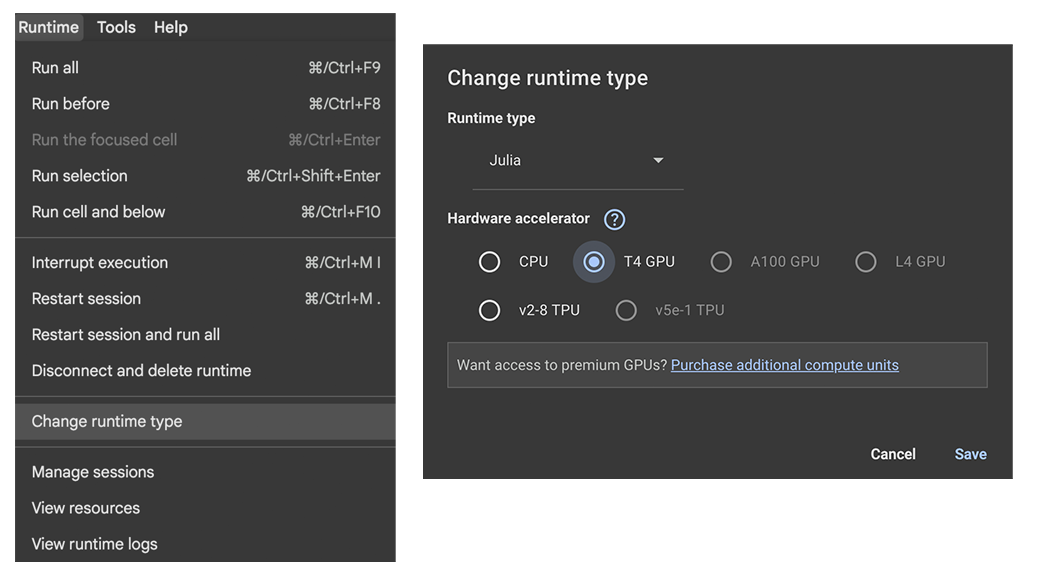

More fancy GPUs are available for [Paid Credits or Pro+ Colab Plans](https://colab.research.google.com/signup).

For more on computational differences between units, please see [Introduction to Cloud TPU](https://cloud.google.com/tpu/docs/intro-to-tpu).

First, please install the [CUDA.jl](https://github.com/JuliaGPU/CUDA.jl) package.

In [3]:
# Check if GPU is available
# Note: This requires the CUDA.jl package
Pkg.add("CUDA")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Next, load the package and test to see if CUDA is available. You may need to change the runtime as the default Google Colab runtime uses a CPU _not_ a GPU.

In [ ]:
using CUDA
println("CUDA is available: $(CUDA.functional())")

CUDA is available: false


### WebIO.jl/Interact.jl Support

`WebIO.jl` is unavailable due to the Jupyter backend not being detected. The error was reported to the Colab team here:

<https://github.com/googlecolab/colabtools/issues/5158>


As a result, any Julia packages depending on `WebIO.jl` features like `Interact.jl` will be unavailable.

## Basic Julia Syntax


Julia syntax combines the readability of Python with the mathematical expressiveness of MATLAB. In this section, we'll explore the fundamental building blocks of Julia code, including variable assignment, basic operations, and string manipulation. Julia's dynamic typing allows for flexibility while its type system provides performance optimizations that most dynamic languages lack.



### Variables and Data Types

Julia's variable system combines flexibility with performance through its sophisticated type system. Variables don't require explicit type declarations, yet Julia uses type inference to optimize code execution. This subsection introduces how to define variables of different types and how to inspect their types using Julia's built-in functions.

> **For R Users**: Julia's variable assignment uses `=` rather than R's `<-`, though both work similarly. Like R, Julia is dynamically typed, but with a more sophisticated type system. Variables don't need explicit declaration as in statically typed languages.
>
> **For Python Users**: Julia's variable assignment is identical to Python's, using the `=` operator. Unlike Python, Julia uses `println()` instead of `print()` for adding newlines, and string interpolation uses `$variable` or `$(variable)` syntax rather than Python's f-strings.



In [ ]:
# Basic variable assignment
x = 10
y = 3.14
name = "Julia"

# Print variables and their types
println("x = $x, type: $(typeof(x))")
println("y = $y, type: $(typeof(y))")
println("name = $name, type: $(typeof(name))")

x = 10, type: Int64
y = 3.14, type: Float64
name = Julia, type: String


### Math Operations

Mathematical operations in Julia are designed to be intuitive and efficient, making the language particularly well-suited for scientific computing. This subsection covers basic arithmetic operations, showcasing Julia's operator syntax and the clarity with which mathematical concepts can be expressed in code.

> **For R and Python Users**: Julia's arithmetic operators are familiar, with most working identically to R and Python. Julia provides additional operators like `÷` for integer division (similar to Python's `//`) and uses `^` for exponentiation (like R) instead of Python's `**`.

In [ ]:
# Basic arithmetic
a = 10
b = 3

println("Addition: $a + $b = $(a + b)")
println("Subtraction: $a - $b = $(a - b)")
println("Multiplication: $a * $b = $(a * b)")
println("Division: $a / $b = $(a / b)")
println("Integer division: $a ÷ $b = $(a ÷ b)")
println("Power: $a ^ $b = $(a ^ b)")
println("Modulus: $a % $b = $(a % b)")

Addition: 10 + 3 = 13
Subtraction: 10 - 3 = 7
Multiplication: 10 * 3 = 30
Division: 10 / 3 = 3.3333333333333335
Integer division: 10 ÷ 3 = 3
Power: 10 ^ 3 = 1000
Modulus: 10 % 3 = 1


### String Operations

String manipulation is essential for data cleaning and presentation. This subsection demonstrates Julia's string handling capabilities, including string interpolation, concatenation, and common string functions that help process textual data efficiently and clearly.

> **For R Users**: Julia's string handling is more consistent than R's, with a unified string type. String interpolation is similar to glue in R with `{variable}`, but built directly into the language.
>
> **For Python Users**: Julia strings are similar to Python's but with different interpolation syntax. Instead of f-strings with `{variable}`, Julia uses `$variable` directly in quoted strings. String concatenation uses `*` operator like MATLAB, not `+` like Python.

In [ ]:
# String concatenation
first_name = "Julia"
last_name = "Language"

# Using string interpolation with $
full_name = "$first_name $last_name"
println(full_name)

# String concatenation with *
println(first_name * " " * last_name)

# String functions
println("Length: $(length(full_name))")
println("Uppercase: $(uppercase(full_name))")
println("Lowercase: $(lowercase(full_name))")

Julia Language
Julia Language
Length: 14
Uppercase: JULIA LANGUAGE
Lowercase: julia language


### Help

The `?` character opens Julia's documentation system inline within the Notebook. Simply type `?` followed by any function, type, or macro name (for example, `?println`), and Julia will immediately display detailed documentation including function signatures, parameter descriptions, and usage examples. This instant access to help makes learning new functions and troubleshooting code much more efficient, as you can quickly look up information without disrupting your workflow or searching external resources.

> **For R users:** This is similar to R's `?function` or `help(function)` syntax, but Julia's help system tends to provide more structured and comprehensive documentation.
>
> **For Python users:** Julia's `?` functionality is comparable to Python's `help()` function or IPython's `?object` syntax, but often provides more detailed type information.

In [ ]:
?println

search: println @cuprintln printstyled PRESERVE_ALL_INSTALLED PRESERVE_TIERED_INSTALLED print sprint



```
println([io::IO], xs...)
```

Print (using [`print`](@ref)) `xs` to `io` followed by a newline. If `io` is not supplied, prints to the default output stream [`stdout`](@ref).

See also [`printstyled`](@ref) to add colors etc.

# Examples

```jldoctest
julia> println("Hello, world")
Hello, world

julia> io = IOBuffer();

julia> println(io, "Hello", ',', " world.")

julia> String(take!(io))
"Hello, world.\n"
```


### Package Management

Julia's package ecosystem is central to its functionality, providing specialized tools for various domains. This subsection covers the basics of interacting with packages: viewing what's installed, installing new packages, and loading them into your session. Julia's built-in package manager handles dependencies automatically, making it easy to extend the language's capabilities for your specific needs.


> **For R Users**: Julia's package manager `Pkg` serves a similar role to R's `install.packages()` and library management, but with built-in dependency resolution. The `using` keyword works similarly to R's `library()` function, but Julia also offers the `import` option for namespace control similar to R's `::` operator.
>
> **For Python Users**: Julia's `Pkg` is equivalent to pip or conda in Python, handling installation and dependencies. The distinction between `using` (similar to Python's `from package import *`) and `import` (like Python's standard `import package`) gives you control over namespace management similar to Python's import system.


In [ ]:
# Import the package manager
using Pkg

# View installed packages
Pkg.status()

# Install a package
Pkg.add("DataFrames")

# Install multiple packages at once
Pkg.add(["Statistics", "Plots"])

# Update packages
Pkg.update()

# Remove a package
# Pkg.rm("PackageName")

Status `~/.julia/environments/v1.10/Project.toml`
  [79e6a3ab] Adapt v4.2.0
  [336ed68f] CSV v0.10.15
  [052768ef] CUDA v5.7.0
  [a93c6f00] DataFrames v1.7.0
  [7073ff75] IJulia v1.26.0
  [b2108857] Lux v1.9.0
  [ee78f7c6] Makie v0.22.2
⌃ [91a5bcdd] Plots v1.40.9
⌃ [3c362404] Reactant v0.2.38
Info Packages marked with ⌃ have new versions available and may be upgradable.


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [10745b16] + Statistics v1.10.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Installed OpenBLASConsistentFPCSR_jll ─ v0.3.29+0
   Installed Static ────────────────────── v1.2.0
   Installed Reactant_jll ──────────────── v0.0.85+0
   Installed Plots ─────────────────────── v1.40.10
   Installed IntervalArithmetic ────────── v0.22.24
   Installed Distributions ─────────────── v0.25.118
   Installed Reactant ──────────────────── v0.2.40
    Updating `~/.julia/environments/v1.10/Project.toml`
  [91a5bcdd] ↑ Plots v1.40.9 ⇒ v1.40.10
  [3c362404] ↑ Reactant v0.2.38 ⇒ v0.2.40
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [31c24e10] ↑ Distributions v0.25.117 ⇒ v0.25

In [ ]:
# Load a package to use its functionality
using DataFrames

# Import with namespace control (functions must be prefixed)
import Statistics

# Import specific functions
using Plots: plot, scatter

# Create a simple DataFrame as a test
df = DataFrame(A = 1:3, B = ["x", "y", "z"])
println("View DataFrame:")
display(df)

# Use a function from Statistics
println("\nMean of 1:10: $(Statistics.mean(1:10))")

View DataFrame:


Row,A,B
,Int64,String
1,1,x
2,2,y
3,3,z



Mean of 1:10: 5.5


#### Package Mode

The `]` character activates Julia's [package manager mode](https://docs.julialang.org/en/v1/stdlib/Pkg/), allowing you to manage dependencies directly within your Jupyter notebook. When you type `]` at the beginning of a cell, the prompt changes to indicate you're in package mode, where you can run commands like `add Plots` to install packages, `status` to view currently installed packages, or `update` to get the latest versions. This integrated approach means you can maintain your project's dependencies without ever leaving your notebook environment, making it easier to document and share reproducible analyses. Alternatively, you can use `using Pkg` to access the same functionality programmatically in regular Julia code with commands like `Pkg.add("Plots")`, which is useful for scripts or conditional package management, but the `]` mode offers a more concise interface for interactive use.

> **For R users:** Unlike R where you use `install.packages()` or `library()` functions directly in your code, Julia's package manager is a separate mode with its own set of commands, similar to how RStudio has a separate Packages tab.
>
> **For Python users:** If you're used to pip or conda commands in terminal/command prompt, Julia's package mode is similar but integrated directly into the REPL and Jupyter environment. It's comparable to using `!pip install` in Jupyter, but with a more comprehensive set of package management commands.

In [ ]:
] status IJulia

Status `~/.julia/environments/v1.10/Project.toml`
  [7073ff75] IJulia v1.26.0


Please make sure to create separate cells for each package manager command, e.g.

In [ ]:
] add Example

   Resolving package versions...
   Installed Example ─ v0.5.5
    Updating `~/.julia/environments/v1.10/Project.toml`
  [7876af07] + Example v0.5.5
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [7876af07] + Example v0.5.5
Precompiling packages...
    811.8 ms  ✓ Example
  1 dependency successfully precompiled in 2 seconds. 463 already precompiled.


## Control Flow



Control flow in Julia provides the familiar constructs found in most programming languages but with some unique syntax. This section covers conditional statements and loops, showcasing how Julia balances readability with performance. Julia's control structures combine the clarity of Python's syntax with the explicit block termination of languages like Ruby.

### Conditionals

Decision-making structures are fundamental to any programming language. This subsection introduces Julia's conditional execution constructs, including if-else statements and the ternary operator, which allow programs to execute different code blocks based on specific conditions.

> **For R Users**: Unlike R's curly braces, Julia uses the keywords `if`, `elseif`, `else`, and `end` to define conditional blocks. Julia also offers the ternary operator (`condition ? true_value : false_value`), which works just like R's `ifelse()` but with cleaner syntax.
>
> **For Python Users**: Julia's conditional syntax is similar to Python's but requires an explicit `end` keyword instead of relying solely on indentation. Julia's ternary operator uses the `?:` syntax common in C-like languages, rather than Python's `<value_if_true> if <condition> else <value_if_false>` syntax.

In [ ]:
# If-else statements
x = 15

if x > 10
    println("x is greater than 10")
elseif x == 10
    println("x is equal to 10")
else
    println("x is less than 10")
end

# Ternary operator
result = x > 10 ? "greater than 10" : "not greater than 10"
println(result)

x is greater than 10
greater than 10


### Loops

Iteration is a core concept in programming, and Julia provides several loop structures to repeat operations efficiently. This subsection demonstrates different types of loops in Julia, including for loops with ranges, while loops, and iteration over collections, all of which are optimized for performance.

> **For R Users**: Julia's loops are more similar to traditional programming languages than R's vectorized operations. The syntax `for i in 1:5` is comparable to R's `for (i in 1:5)`, but Julia's loops are much faster, making explicit iteration more practical than in R where it's often avoided for performance reasons.
>
> **For Python Users**: Julia's `for` loops look almost identical to Python's, using `in` to iterate over collections. One important difference: Julia's ranges like `1:5` are inclusive of the end value (like Python's `range(1,6)`), and Julia's array indexing starts at 1, not 0.

In [ ]:
# For loop
println("For loop with range:")
for i in 1:5
    println(i)
end

# While loop
println("\nWhile loop:")
counter = 1
while counter <= 5
    println(counter)
    counter += 1
end

# Loop with array
println("\nIterating through array:")
fruits = ["apple", "banana", "cherry"]
for fruit in fruits
    println(fruit)
end

For loop with range:
1
2
3
4
5

While loop:
1
2
3
4
5

Iterating through array:
apple
banana
cherry


## Data Structures



Julia offers powerful built-in data structures that form the foundation for data manipulation. This section demonstrates arrays (Julia's primary data structure) and dictionaries, showing how they can be created, accessed, and modified. Julia's arrays are particularly notable for their performance and flexibility in scientific computing.

### Arrays

Arrays are Julia's primary data structure for numerical computations and form the foundation of scientific computing in the language. This subsection explores creating, manipulating, and operating on arrays, showcasing both one-dimensional vectors and multi-dimensional matrices.

> **For R Users**: Julia's arrays are similar to R's matrices and arrays, but with better performance characteristics. Unlike R's 1-based indexing that many other languages don't use, Julia also uses 1-based indexing. One key difference: Julia uses square brackets for indexing, not `c(x1, x2, ...)` as in R.
>
> **For Python Users**: Julia arrays are similar to NumPy arrays, offering efficient numerical operations. Key differences: Julia uses 1-based indexing (not 0-based like Python), and Julia's arrays are column-major (like MATLAB) rather than row-major like NumPy. The `push!` function is equivalent to Python's `append`, and the `!` indicates the function modifies its argument.

In [ ]:
# Creating arrays
integers = [1, 2, 3, 4, 5]
mixed = [1, 3.14, "Hello"]
matrix = [1 2 3; 4 5 6; 7 8 9]  # 2D array/matrix

println("integers: $integers")
println("mixed: $mixed")
println("matrix:")
display(matrix)

# Array operations
println("\nFirst element: $(integers[1])")  # Julia uses 1-based indexing!
println("Length: $(length(integers))")
println("Sum: $(sum(integers))")
push!(integers, 6)  # Add element to the end
println("After push: $integers")

integers: [1, 2, 3, 4, 5]
mixed: Any[1, 3.14, "Hello"]
matrix:


3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9


First element: 1
Length: 5
Sum: 15
After push: [1, 2, 3, 4, 5, 6]


### Dictionaries

Key-value mappings provide flexible data organization capabilities essential for many programming tasks. This subsection introduces dictionaries in Julia, demonstrating how to create, access, and modify these associative collections to store and retrieve data efficiently.


> **For R Users**: Julia's dictionaries are equivalent to R's named lists or environments, providing key-value storage. The syntax is more explicit than R's list naming, using the `=>` operator to connect keys and values.
>
> **For Python Users**: Julia's dictionaries work almost identically to Python dictionaries, but use the `=>` operator to separate keys and values in creation (instead of Python's `:`) and require the `Dict()` constructor. Accessing elements uses the same square bracket notation as Python.



In [ ]:
# Creating a dictionary
person = Dict(
    "name" => "Julia",
    "age" => 10,
    "is_language" => true
)

println("Dictionary: ", person)
println("Name: $(get(person, "name", "Unknown"))")
println("Age: $(get(person, "age", "Unknown"))")

# Adding a new key-value pair
person["location"] = "Everywhere"
println("Updated dictionary: ", person)

# Iterating through key-value pairs
println("\nDictionary contents:")
for (key, value) in person
    println("$key: $value")
end

Dictionary: Dict{String, Any}("name" => "Julia", "is_language" => true, "age" => 10)
Name: Julia
Age: 10
Updated dictionary: Dict{String, Any}("name" => "Julia", "location" => "Everywhere", "is_language" => true, "age" => 10)

Dictionary contents:
name: Julia
location: Everywhere
is_language: true
age: 10


## Functions


Functions are first-class objects in Julia and form the core of Julia's design philosophy. This section introduces function definition syntax, anonymous functions, and Julia's standout feature: multiple dispatch. Multiple dispatch allows functions to have different implementations based on the types of all arguments, enabling elegant solutions to complex problems.

### Basic Functions

Functions encapsulate reusable pieces of code and are fundamental to Julia's design philosophy. This subsection covers various ways to define functions in Julia, from traditional multi-line definitions to compact one-liners and anonymous functions, highlighting Julia's flexible function syntax.

> **For R Users**: Julia functions look similar to R functions but use the `function` keyword instead of just parentheses and curly braces. Julia also allows for more compact one-line function definitions similar to R's assignment form. The `return` keyword is optional in both languages.
>
> **For Python Users**: Julia's function syntax will feel familiar, using the `function` keyword (like Python's `def`), with parameters in parentheses. One key difference is Julia's optional `return` keyword - the last expression in a function is automatically returned if no explicit return is given, similar to Ruby or Scala.


In [ ]:
# Function definition
function greet(name)
    return "Hello, $(name)!"
end

# Calling the function
message = greet("Julia User")
println(message)

# One-line function definition
square(x) = x^2
println("Square of 5: $(square(5))")

# Anonymous function
cube = x -> x^3
println("Cube of 3: $(cube(3))")

Hello, Julia User!
Square of 5: 25
Cube of 3: 27


### Multiple Dispatch

Multiple dispatch is one of Julia's most distinctive and powerful features, allowing functions to have different implementations based on argument types. This subsection demonstrates how multiple dispatch enables elegant solutions to complex problems by writing specialized methods for different data types.

> **For R Users**: Multiple dispatch is a powerful Julia feature that extends beyond R's S3 or S4 object systems. While R uses different function names or complex class-based dispatch, Julia allows the same function name to have different implementations based on argument types, chosen at compile time for efficiency.
>
> **For Python Users**: Multiple dispatch is a key Julia feature with no direct equivalent in Python. Unlike Python's single dispatch methods or function overloading via decorators, Julia's dispatch system selects the most specific method based on all argument types, not just the first. This creates elegant, high-performance code that handles different data types naturally.

In [ ]:
# Multiple dispatch - Julia's key feature
# Same function name, different argument types

function process(x::Int)
    return "Processing integer: $x"
end

function process(x::String)
    return "Processing string: $x"
end

function process(x::Float64, y::Float64)
    return "Processing two floats: $x and $y"
end

println(process(42))
println(process("Hello"))
println(process(3.14, 2.71))

Processing integer: 42
Processing string: Hello
Processing two floats: 3.14 and 2.71


## Plotting with Plots.jl


Data visualization is essential for data analysis, and Julia's [Plots.jl](https://docs.juliaplots.org/stable/) package provides a flexible interface for creating high-quality graphics. This section demonstrates how to create basic plots and customize them. Plots.jl serves as a unified interface to various plotting backends, combining the best of several visualization libraries.

> **For R Users**: Plots.jl provides a unified interface to various plotting backends, similar to how ggplot2 works in R but with a different syntax philosophy. If you're used to R's plotting ecosystem, you'll find Plots.jl offers similar functionality with a more consistent API across different plot types.
>
> **For Python Users**: Plots.jl functions similarly to Python's matplotlib and seaborn combined, offering both quick plotting capabilities and customization options. Unlike matplotlib's somewhat inconsistent API that evolved over time, Plots.jl was designed with a consistent interface from the beginning.

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


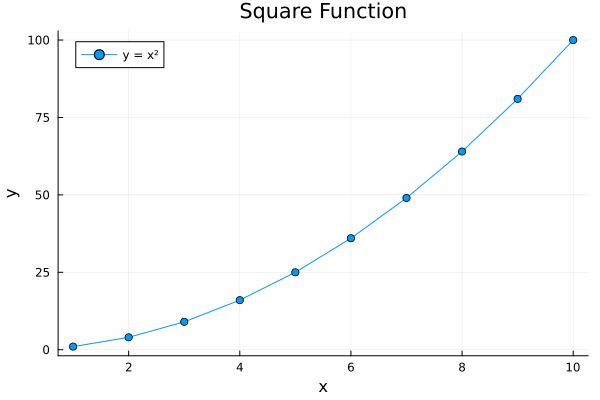

In [ ]:
# Install and import the Plots package
using Pkg
Pkg.add("Plots")
using Plots

# Create a simple plot
x = 1:10
y = x.^2

plot(x, y,
     title = "Square Function",
     label = "y = x²",
     xlabel = "x",
     ylabel = "y",
     marker = :circle)

## DataFrames for Data Analysis


[DataFrames.jl](https://dataframes.juliadata.org/stable/) provides tabular data functionality similar to pandas in Python or data.frames in R. This section shows how to create, manipulate, and analyze tabular data efficiently. DataFrames.jl is designed for both ease of use and high performance, making it ideal for data science workflows.

> **For R Users**: Julia's DataFrames.jl will feel very familiar if you're coming from R's data.frame or tibble objects. The syntax is different, but the core concepts of columns, rows, and tabular operations are quite similar. Julia's implementation offers type stability advantages that R's data.frames don't have.
>
> **For Python Users**: DataFrames.jl provides similar functionality to pandas in Python, with comparable methods for data manipulation. The syntax is different, but if you know pandas or polars operations like filtering, grouping, and aggregating, you'll find equivalent capabilities in DataFrames.jl with generally better performance.

In [ ]:
# Install and load packages
using Pkg
Pkg.add("DataFrames")
using DataFrames

# Create a DataFrame
df = DataFrame(
    Name = ["Alice", "Bob", "Charlie", "David"],
    Age = [25, 30, 35, 40],
    Salary = [50000, 60000, 70000, 80000]
)

# Display the DataFrame
println("DataFrame:")
display(df)

# Basic operations
println("\nFirst two rows:")
display(first(df, 2))

println("\nSummary statistics:")
describe(df)

# Filtering
println("\nPeople older than 30:")
display(filter(row -> row.Age > 30, df))

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


DataFrame:


Row,Name,Age,Salary
,String,Int64,Int64
1,Alice,25,50000
2,Bob,30,60000
3,Charlie,35,70000
4,David,40,80000



First two rows:


Row,Name,Age,Salary
,String,Int64,Int64
1,Alice,25,50000
2,Bob,30,60000



Summary statistics:

People older than 30:


Row,Name,Age,Salary
,String,Int64,Int64
1,Charlie,35,70000
2,David,40,80000


## Linear Algebra

Linear algebra operations are fundamental to scientific computing, and Julia provides first-class support for these operations. This section covers basic matrix operations, demonstrating Julia's natural mathematical syntax. Julia's linear algebra capabilities are not only syntactically elegant but also highly optimized for performance.

> **For R Users**: Julia's linear algebra capabilities are integrated directly into the language, unlike R where you often need specialized packages. Julia's syntax for matrix operations is cleaner and more intuitive than R's, and performance is typically much better, especially for complex operations.
>
> **For Python Users**: Linear algebra in Julia is similar to NumPy but doesn't require a separate import for basic operations. Matrix multiplication uses `*` directly (not `@` as in Python), the syntax is more mathematical, and Julia's performance is typically superior, especially for user-defined functions that work with matrices.

In [ ]:
using LinearAlgebra  # Add this import for det, inv, eigvals functions

# Define a matrix
A = [1 2; 3 4]
# Define a vector
b = [5, 6]

println("Matrix A:")
display(A)
println("\nVector b: $b")

# Matrix operations
println("\nDeterminant of A: $(det(A))")
println("Inverse of A:")
display(inv(A))
println("\nA * b: $(A * b)")
println("Eigenvalues of A: $(eigvals(A))")

Matrix A:


2×2 Matrix{Int64}:
 1  2
 3  4


Vector b: [5, 6]

Determinant of A: -2.0
Inverse of A:


2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5


A * b: [17, 39]
Eigenvalues of A: [-0.3722813232690143, 5.372281323269014]


## Data Wrangling with Tidier.jl


Data preparation often consumes a significant portion of any data analysis workflow. This section showcases Tidier.jl, which brings the popular "tidyverse" approach from R to Julia. Tidier.jl enables clear, readable data transformation pipelines that make complex data wrangling tasks more manageable and maintainable.

> **For R Users**: Tidier.jl brings the familiar tidyverse workflow to Julia. If you love dplyr and the pipe operator in R, you'll appreciate how Tidier.jl implements similar functionality with Julia's performance benefits. The pipe operator `@chain <data> begin <lines> end` works similarly to R's `%>%`/`|>`, and functions like `@filter` and `@group_by` mirror their dplyr counterparts.
>
> **For Python Users**: If you're used to pandas' or polars' method chaining or dplyr-like packages in Python (like siuba), Tidier.jl offers a more consistent and powerful approach to data transformation with better performance. The piping syntax creates readable data transformation workflows similar to pandas' method chaining, but with more flexibility.


### Install and load `Tidier.jl`

In [ ]:
# Install and load Tidier.jl
using Pkg
Pkg.add(["Tidier", "RDatasets", "CairoMakie"])
using Tidier, DataFrames, RDatasets, CairoMakie

   Resolving package versions...
   Installed Cleaner ─────────── v0.5.0
   Installed RData ───────────── v0.8.3
   Installed CategoricalArrays ─ v0.10.8
   Installed Graphics ────────── v1.1.3
   Installed Tidier ──────────── v0.7.7
   Installed Cairo ───────────── v1.1.1
   Installed TimeZones ───────── v1.21.3
   Installed Mocking ─────────── v0.8.1
   Installed TZJData ─────────── v1.4.0+2025a
   Installed Chain ───────────── v0.5.0
   Installed ShiftedArrays ───── v2.0.0
   Installed CairoMakie ──────── v0.13.2
   Installed RDatasets ───────── v0.7.7
    Updating `~/.julia/environments/v1.10/Project.toml`
  [13f3f980] + CairoMakie v0.13.2
  [ce6b1742] + RDatasets v0.7.7
⌃ [f0413319] + Tidier v0.7.7
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [159f3aea] + Cairo v1.1.1
  [13f3f980] + CairoMakie v0.13.2
  [324d7699] + CategoricalArrays v0.10.8
⌅ [8be319e6] + Chain v0.5.0
⌅ [caabdcdb] + Cleaner v0.5.0
  [a2bd30eb] + Graphics v1.1.3
  [78c3b35d] + Mocking v0.8.1
⌅ [df47a

### Analysis with Diamonds

#### Load Built-in Data

In [ ]:
# Load a dataset
diamonds = dataset("ggplot2", "diamonds")
println("Diamonds dataset structure:")
display(first(diamonds, 5))

println("Glimpse of Diamonds data structure:")
@glimpse diamonds

Diamonds dataset structure:


Row,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
,Float64,Cat…,Cat…,Cat…,Float64,Float64,Int32,Float64,Float64,Float64
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Glimpse of Diamonds data structure:
Rows: 53940
Columns: 10
.Carat         Float64        0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.
.Cut           CategoricalArrays.CategoricalValue{String, UInt8}Ideal, Premium, 
.Color         CategoricalArrays.CategoricalValue{String, UInt8}E, E, E, I, J, J
.Clarity       CategoricalArrays.CategoricalValue{String, UInt8}SI2, SI1, VS1, V
.Depth         Float64        61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65
.Table         Float64        55.0, 61.0, 65.0, 58.0, 58.0, 57.0, 57.0, 55.0, 61
.Price         Int32          326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 
.X             Float64        3.95, 3.89, 4.05, 4.2, 4.34, 3.94, 3.95, 4.07, 3.8
.Y             Float64        3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.
.Z             Float64        2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.


#### Wrangle counts

In [ ]:

# Using Tidier.jl's verb-based approach (similar to dplyr in R)
result = @chain diamonds begin
    @filter(Carat > 2)
    @group_by(Cut)
    @summarize(
        Count = n(),
        Avg_price = mean(Price),
        Max_carat = maximum(Carat)
    )
    @arrange(desc(Avg_price))
  end

println("\nSummary of large diamonds by cut:")
display(result)



Summary of large diamonds by cut:


Row,Cut,Count,Avg_price,Max_carat
,Cat…,Int64,Float64,Float64
1,Ideal,473,15589.1,3.5
2,Very Good,388,15133.0,4.0
3,Premium,743,14992.2,4.01
4,Good,168,14629.0,3.01
5,Fair,117,11972.1,5.01


#### Visualizing Results


Visualizing the results:


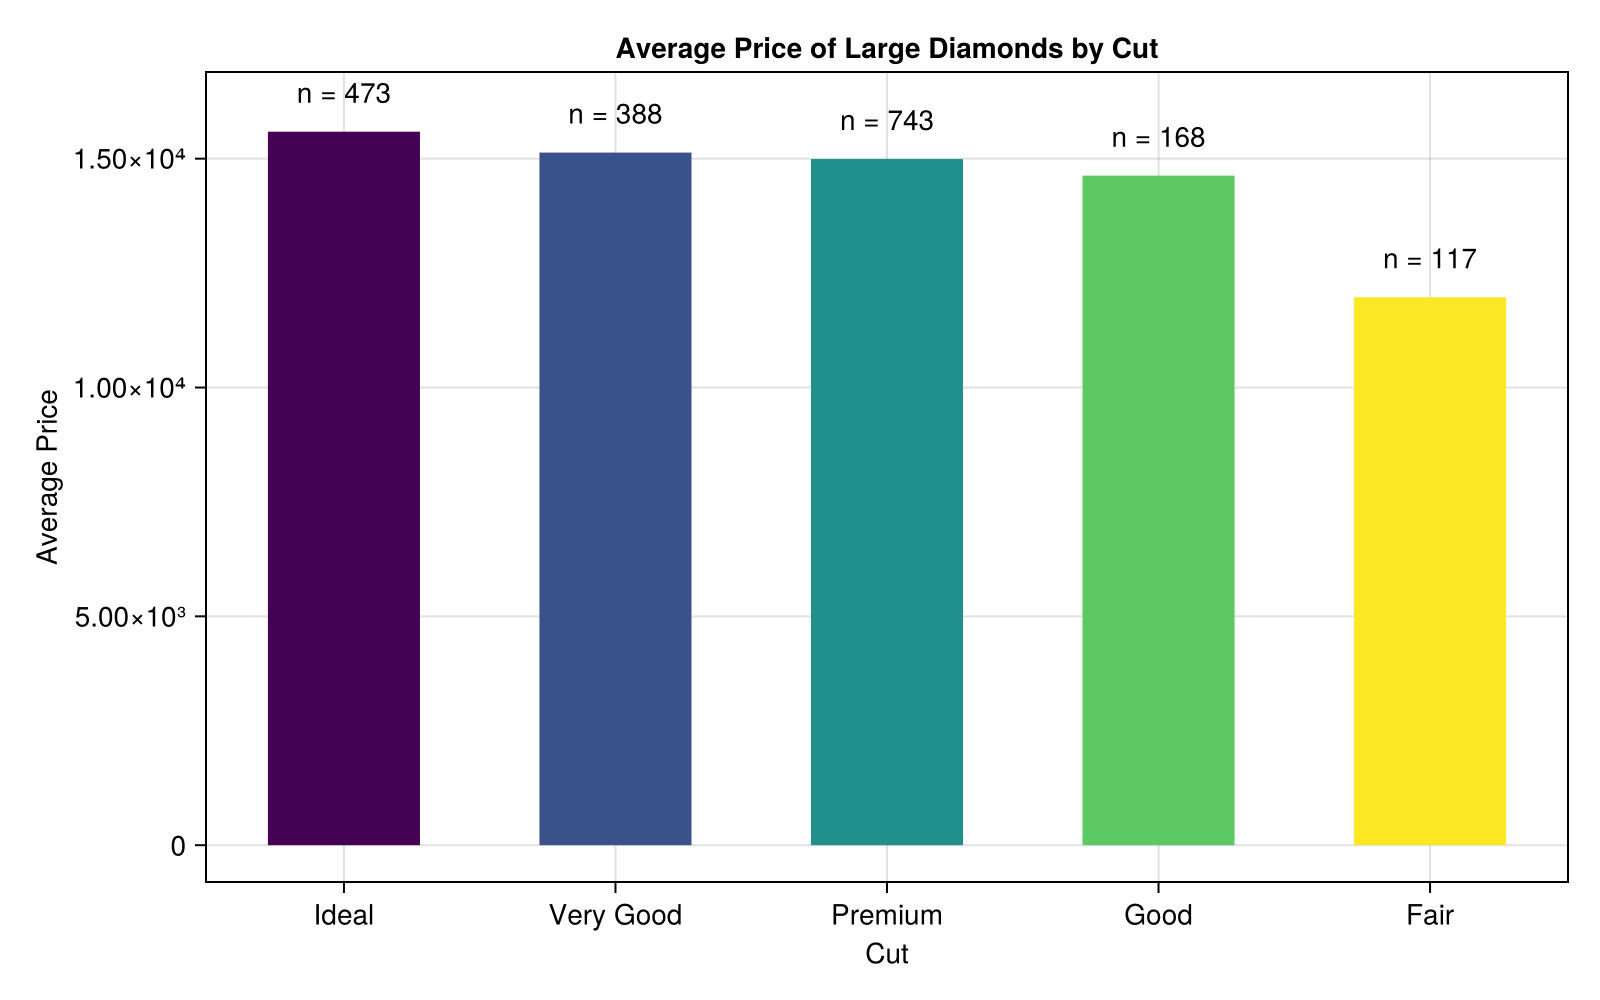

In [ ]:
# Creating a plot with results
println("\nVisualizing the results:")
fig = Figure(size = (800, 500))
ax = Axis(fig[1, 1],
    xlabel = "Cut",
    ylabel = "Average Price",
    title = "Average Price of Large Diamonds by Cut")

# Convert categorical to numeric indices for plotting
cut_categories = collect(1:nrow(result))
barplot!(ax, cut_categories, result.Avg_price,
    color = cut_categories,
    width = 0.7)

# Set the x-axis labels to use the cut names
ax.xticks = (cut_categories, string.(result.Cut))

# Add count labels above bars
for (i, y) in enumerate(result.Avg_price)
    text!(ax, "n = $(result.Count[i])",
        position = (i, y + 500),
        align = (:center, :bottom))
end

fig

## Performance Benchmarking

Performance is a key selling point of Julia, and measuring that performance accurately is important for optimization. This subsection introduces Julia's benchmarking tools, particularly the [`BenchmarkTools.jl` package](https://juliaci.github.io/BenchmarkTools.jl/stable/), which provides more reliable performance measurements than the simple [`@time` macro](https://docs.julialang.org/en/v1/manual/profile/#@time).

> **For R Users**: Julia's performance is one of its main advantages over R. While R often requires moving performance-critical code to C++ via Rcpp, Julia code is fast by default. The `BenchmarkTools.jl` package provides functionality similar to R's `microbenchmark` package but with more detailed diagnostics.
>
> **For Python Users**: Julia typically achieves significantly better performance than pure Python code without requiring a separate compiled extension as Python does with C extensions or Cython. The `BenchmarkTools.jl` package offers similar functionality to Python's `timeit` module but with more comprehensive statistics.

In [ ]:
# First, install BenchmarkTools
using Pkg
Pkg.add("BenchmarkTools")

using BenchmarkTools

# Let's define a more realistic benchmark that won't be fully optimized away
# Matrix multiplication is a good example of computation-heavy code
function matrix_benchmark(n)
    A = rand(n, n)
    B = rand(n, n)
    return A * B  # Matrix multiplication
end

# Benchmarking with different matrix sizes
println("Benchmarking matrix multiplication:")

# Small matrix (100x100)
println("\nSmall matrix (100x100):")
@btime matrix_benchmark(100);

# Medium matrix (500x500)
println("\nMedium matrix (500x500):")
@btime matrix_benchmark(500);

   Resolving package versions...
   Installed BenchmarkTools ─ v1.6.0
    Updating `~/.julia/environments/v1.10/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.0
  [9abbd945] + Profile
Precompiling packages...
   1851.4 ms  ✓ BenchmarkTools
  1 dependency successfully precompiled in 3 seconds. 482 already precompiled.


Benchmarking matrix multiplication:

Small matrix (100x100):
  111.578 μs (6 allocations: 234.52 KiB)

Medium matrix (500x500):
  8.798 ms (6 allocations: 5.72 MiB)


Let's explore another benchmark scenario: array operations vs. loops

In [ ]:
println("\nComparing array operations vs. loops for vector operations:")

# Create test arrays
n = 10_000_000
v1 = rand(n);
v2 = rand(n);

# Vectorized operation (using Julia's built-in array operations)
function vector_add(a, b)
    return a .+ b
end

# Loop-based approach
function loop_add(a, b)
    result = similar(a)
    for i in 1:length(a)
        result[i] = a[i] + b[i]
    end
    return result
end

println("\nTime for vectorized addition:")
@btime vector_add($v1, $v2);

println("\nTime for loop-based addition:")
@btime loop_add($v1, $v2);


Comparing array operations vs. loops for vector operations:

Time for vectorized addition:
  51.921 ms (2 allocations: 76.29 MiB)

Time for loop-based addition:
  54.015 ms (2 allocations: 76.29 MiB)


Finally, let's take a moment and see how we can obtain specific benchmark details.

In [ ]:
benchmark_result = @benchmark vector_add($v1, $v2)
display(benchmark_result)
println("\nMinimum time: $(minimum(benchmark_result).time) ms")
println("Median time: $(median(benchmark_result).time) ms")
println("Mean time: $(mean(benchmark_result).time) ms")
println("Maximum time: $(maximum(benchmark_result).time) ms")
println("Standard deviation: $(std(benchmark_result).time) ms")

BenchmarkTools.Trial: 56 samples with 1 evaluation per sample.
 Range (min … max):  58.834 ms … 160.787 ms  ┊ GC (min … max):  0.00% … 41.32%
 Time  (median):     81.669 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   89.801 ms ±  23.853 ms  ┊ GC (mean ± σ):  11.76% ± 15.16%

         ▂ ▅█ ▂▂   ▅    ▂                                       
  █▁▁▅█▅▅█▅██▅██▅▁▅█▁▅▅▅█▅▁▅▁▁▁▁▅▅▁▅▁▁▁▅█▁▁█▅▁▁█▁▁▁▁▁▁▁▅▁▁▅▁▁▅ ▁
  58.8 ms         Histogram: frequency by time          147 ms <

 Memory estimate: 76.29 MiB, allocs estimate: 2.


Minimum time: 5.8834323e7 ms
Median time: 8.1669006e7 ms
Mean time: 8.980131380357143e7 ms
Maximum time: 1.60786574e8 ms
Standard deviation: 2.3852596833919115e7 ms


## Parallel Computing

Julia was designed with parallelism in mind. This section introduces Julia's built-in parallel computing capabilities, showing how to distribute work across multiple processors. Julia makes parallelization accessible with simple constructs that abstract away much of the complexity typically associated with parallel programming.

> **For Python and R Users**: Julia's parallel computing capabilities are built into the language, unlike Python where you need modules like `multiprocessing` or R's various parallel packages. Julia makes parallelization straightforward with macros like `@distributed` and `@threads`, similar to OpenMP but more intuitive.

In [ ]:
# Adding processors
using Distributed
addprocs(2)  # Add 2 worker processes
println("Number of available processors: $(nprocs())")

# Parallel map function
result = @distributed (+) for i in 1:10
    i^2
end
println("Sum of squares from 1 to 10 using parallel processing: $result")

Number of available processors: 3
Sum of squares from 1 to 10 using parallel processing: 385


## Additional Features and Examples



### Julia's Type System

Julia has a rich type system that allows for both abstract and concrete types:

In [ ]:
# Custom type definition
struct Point
    x::Float64
    y::Float64
end

# Create an instance
p = Point(3.0, 4.0)
println("Point: x = $(p.x), y = $(p.y)")
println("Type of p: $(typeof(p))")

# Calculate distance from origin
distance(p::Point) = sqrt(p.x^2 + p.y^2)
println("Distance from origin: $(distance(p))")

# Type hierarchy
println("\nType hierarchy:")
println("Point <: Any: $(Point <: Any)")
println("Float64 <: Number: $(Float64 <: Number)")
println("Float64 <: Integer: $(Float64 <: Integer)")

Point: x = 3.0, y = 4.0
Type of p: Point
Distance from origin: 5.0

Type hierarchy:
Point <: Any: true
Float64 <: Number: true
Float64 <: Integer: false


### Metaprogramming with Macros

Julia's macros allow powerful code generation and transformation:

In [ ]:
# Define a simple macro that creates a squaring function
macro squarefunc(funcname)
    func_symbol = esc(funcname)
    return quote
        $func_symbol(x) = x^2
    end
end

# Use the macro to create a function
@squarefunc mysquare

# Use the generated function
println("mysquare(4) = $(mysquare(4))")

# Look at the expression representation
expr = :(x + 2y)
println("\nExpression: $expr")
println("Expression parts: $(expr.args)")

mysquare(4) = 16

Expression: x + 2y
Expression parts: Any[:+, :x, :(2y)]


### Working with External Data

Julia has excellent support for working with external data sources:

In [ ]:
# Install and load CSV and HTTP packages
using Pkg
Pkg.add(["CSV", "HTTP"])
using CSV, HTTP

# Define a function to download and parse a CSV from a URL
function get_sample_data(url)
    response = HTTP.get(url)
    data = CSV.read(IOBuffer(response.body), DataFrame)
    return data
end

# Retrieve the data
url = "https://coatless.github.io/raw-data/penguins.csv"
iris_data = get_sample_data(url)
first(iris_data, 5)

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [cd3eb016] + HTTP v1.10.15
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,Float64?,Float64?,Int64?,Int64?,String7?
1,Adelie,Torgersen,39.1,18.7,181,3750,MALE
2,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
3,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
4,Adelie,Torgersen,missing,missing,missing,missing,missing
5,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE


### Working with Dates and Times

In [ ]:
# Julia has a built-in Dates module
using Dates

# Current date and time
current_datetime = now()
println("Current date and time: $current_datetime")
println("Current date: $(Date(current_datetime))")

# Date arithmetic
today_date = today()
one_week_later = today_date + Day(7)
println("Today: $today_date")
println("One week later: $one_week_later")
println("Days difference: $(one_week_later - today_date)")

# Formatting dates
formatted_date = Dates.format(today_date, "yyyy-mm-dd")
println("Formatted date: $formatted_date")

Current date and time: 2025-03-13T01:31:18.974
Current date: 2025-03-13
Today: 2025-03-13
One week later: 2025-03-20
Days difference: 7 days
Formatted date: 2025-03-13


### Exception Handling in Julia

In [ ]:
# Basic try-catch block
function divide_safely(x, y)
    try
        result = x / y
        return "Result: $result"
    catch e
        if isa(e, DivideError)
            return "Error: Cannot divide by zero"
        else
            return "Unknown error: $(typeof(e))"
        end
    finally
        println("Division operation attempted")
    end
end

# Test the function
println(divide_safely(10, 2))
println(divide_safely(10, 0))

Division operation attempted
Result: 5.0
Division operation attempted
Result: Inf


## Fin

This notebook has provided an introduction to the Julia programming language, covering its basic syntax, data structures, functions, and various libraries for plotting, data analysis, and scientific computing.



### Resources for Learning More:

- [Google Colab: Julia added as a Language Announcement](https://github.com/googlecolab/colabtools/issues/5151)
- [Official Julia Documentation](https://docs.julialang.org/)
- [Julia Academy](https://juliaacademy.com/) - Free courses on Julia
- [Julia Discourse](https://discourse.julialang.org/) - Community forum
- [JuliaHub](https://juliahub.com/) - Package registry and documentation
- [The Julia Programming Language Book](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html)



Happy coding with Julia on Google Colab!